In [992]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as smodels
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [993]:
df=pd.read_csv('C:/Users//Downloads/naman python/ana lytics/loan prediction/bigmart sales/train_v9rqX0R (1).csv')
df.head()   

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [994]:
df.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [995]:
df.set_index('Item_Identifier',inplace=True)

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'Item_Weight'),
  Text(2, 0, 'Item_Visibility'),
  Text(3, 0, 'Item_MRP'),
  Text(4, 0, 'Outlet_Establishment_Year'),
  Text(5, 0, 'Item_Outlet_Sales')])

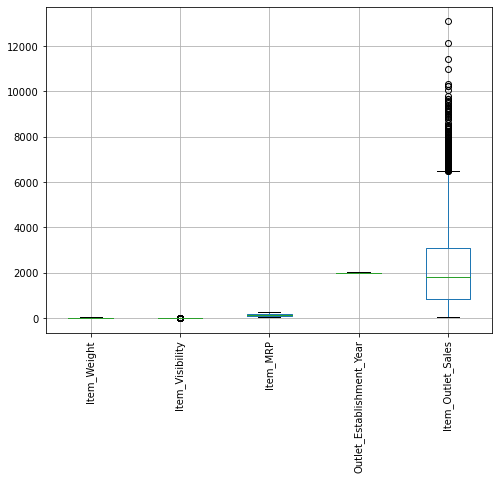

In [996]:
plt.figure(figsize=[8,6])
df.boxplot()
plt.xticks(rotation=90)

q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

ll=q1-1.5*iqr
ul=q3+1.5*iqr

df=df[~((df >ul ) | ( df <ll )).any(axis=1)]

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'Item_Weight'),
  Text(2, 0, 'Item_Visibility'),
  Text(3, 0, 'Item_MRP'),
  Text(4, 0, 'Outlet_Establishment_Year'),
  Text(5, 0, 'Item_Outlet_Sales')])

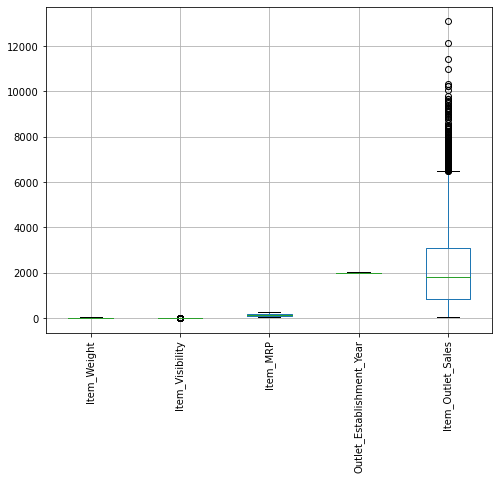

In [997]:
plt.figure(figsize=[8,6])
df.boxplot()
plt.xticks(rotation=90)

In [998]:
df.isnull().sum()/len(df)*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [999]:
df=df.dropna(subset=['Item_Weight','Outlet_Size'])

In [1000]:
df.isnull().sum()/len(df)*100

Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

<AxesSubplot:>

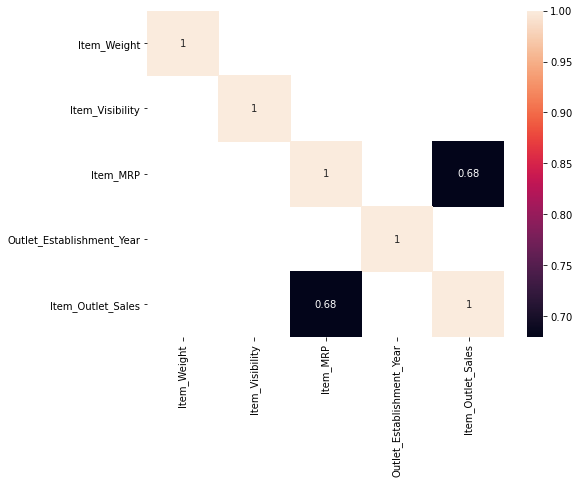

In [1001]:
plt.figure(figsize=[8,6])
sns.heatmap(df.corr()[df.corr()>0.6],annot=True)

In [1002]:
df.select_dtypes(include=np.number)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
FDA15,9.300,0.016047,249.8092,1999,3735.1380
DRC01,5.920,0.019278,48.2692,2009,443.4228
FDN15,17.500,0.016760,141.6180,1999,2097.2700
NCD19,8.930,0.000000,53.8614,1987,994.7052
FDP36,10.395,0.000000,51.4008,2009,556.6088
...,...,...,...,...,...
FDF53,20.750,0.083607,178.8318,1997,3608.6360
FDF22,6.865,0.056783,214.5218,1987,2778.3834
NCJ29,10.600,0.035186,85.1224,2004,1193.1136


In [1003]:
df.select_dtypes(exclude=np.number)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,
FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
FDP36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
...,...,...,...,...,...,...
FDF53,reg,Frozen Foods,OUT046,Small,Tier 1,Supermarket Type1
FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1


In [1004]:
df.Item_Fat_Content.value_counts()

Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64

In [1005]:
df.Item_Type.value_counts()

Fruits and Vegetables    670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Seafood                   33
Name: Item_Type, dtype: int64

In [1006]:
df.Outlet_Identifier.value_counts()

OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT018    928
Name: Outlet_Identifier, dtype: int64

In [1007]:
df.Outlet_Size.value_counts()

Small     1860
Medium    1858
High       932
Name: Outlet_Size, dtype: int64

In [1008]:
df.Outlet_Location_Type.value_counts()

Tier 1    1860
Tier 3    1860
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

In [1009]:
df.Outlet_Type.value_counts()

Supermarket Type1    3722
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [1010]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [1011]:
df.Item_Fat_Content=le.fit_transform(df.Item_Fat_Content)
df.Item_Type=le.fit_transform(df.Item_Type)
df.Outlet_Identifier=le.fit_transform(df.Outlet_Identifier)
df.Outlet_Size=le.fit_transform(df.Outlet_Size)
df.Outlet_Location_Type=le.fit_transform(df.Outlet_Location_Type)
df.Outlet_Type=le.fit_transform(df.Outlet_Type)

In [1012]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.300,1,0.016047,4,249.8092,4,1999,1,0,0,3735.1380
DRC01,5.920,2,0.019278,14,48.2692,1,2009,1,2,1,443.4228
FDN15,17.500,1,0.016760,10,141.6180,4,1999,1,0,0,2097.2700
NCD19,8.930,1,0.000000,9,53.8614,0,1987,0,2,0,994.7052
FDP36,10.395,2,0.000000,0,51.4008,1,2009,1,2,1,556.6088


In [1013]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [1014]:
df.Outlet_Establishment_Year.value_counts()

1987    932
2004    930
1997    930
1999    930
2009    928
Name: Outlet_Establishment_Year, dtype: int64

In [1015]:
df=df.drop('Outlet_Establishment_Year',axis=1)

In [1016]:
df.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_Type                 int32
Item_MRP                float64
Outlet_Identifier         int32
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_Type               int32
Item_Outlet_Sales       float64
dtype: object

In [1017]:
df.shape

(4650, 10)

In [1018]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,
FDA15,9.300,1,0.016047,4,249.8092,4,1,0,0,3735.1380
DRC01,5.920,2,0.019278,14,48.2692,1,1,2,1,443.4228
FDN15,17.500,1,0.016760,10,141.6180,4,1,0,0,2097.2700
NCD19,8.930,1,0.000000,9,53.8614,0,0,2,0,994.7052
FDP36,10.395,2,0.000000,0,51.4008,1,1,2,1,556.6088


In [1019]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP
Item_Identifier,,,,,
FDA15,9.300,1,0.016047,4,249.8092
DRC01,5.920,2,0.019278,14,48.2692
FDN15,17.500,1,0.016760,10,141.6180
NCD19,8.930,1,0.000000,9,53.8614
FDP36,10.395,2,0.000000,0,51.4008


In [1020]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Using Linear regression

In [1021]:
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
#y = (y - y.mean()) / y.std()

from sklearn.linear_model import LinearRegression 
lr=LinearRegression()

X_train_scaled=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)


lr=LinearRegression()
lr_model=lr.fit(X_train_scaled,y_train)
y_pred_linear=lr_model.predict(X_test_scaled)

print('mse -PT  ',mean_squared_error(y_test,y_pred_linear))
print('Rmse -PT ',np.sqrt(mean_squared_error(y_test,y_pred_linear)))

print('r 2 square-PT ',r2_score(y_test,y_pred_linear))
print()

print('train score ',lr_model.score(X_train_scaled,y_train))
print('test score ',lr_model.score(X_test_scaled,y_test))

mse -PT   1224964.6987077477
Rmse -PT  1106.7812334457735
r 2 square-PT  0.4825269984145323

train score  0.4679816174653386
test score  0.4825269984145323


In [1022]:
vif=pd.DataFrame({'Columns ':X_train_scaled.columns,'VIF':[variance_inflation_factor(X_train_scaled.values,i) for i in range(X_train_scaled.shape[1])]})
vif

,Columns,VIF
0,Item_Weight,1.002448
1,Item_Fat_Content,1.018110
2,Item_Visibility,1.003441
3,Item_Type,1.016191
4,Item_MRP,1.002959
5,Outlet_Identifier,19.850151
6,Outlet_Size,1.869900
7,Outlet_Location_Type,28.923783
8,Outlet_Type,3.114482


In [1023]:
vif['Columns ']

0             Item_Weight
1        Item_Fat_Content
2         Item_Visibility
3               Item_Type
4                Item_MRP
5       Outlet_Identifier
6             Outlet_Size
7    Outlet_Location_Type
8             Outlet_Type
Name: Columns , dtype: object

In [1024]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Model after Dropping Outlet_Location_Type

In [1025]:
X=df.drop(['Item_Outlet_Sales','Outlet_Location_Type'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train_scaled=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [1026]:
vif=pd.DataFrame({'Columns ':X_train_scaled.columns,'VIF':[variance_inflation_factor(X_train_scaled.values,i) for i in range(X_train_scaled.shape[1])]})
vif

,Columns,VIF
0,Item_Weight,1.002426
1,Item_Fat_Content,1.018109
2,Item_Visibility,1.003351
3,Item_Type,1.016088
4,Item_MRP,1.002750
5,Outlet_Identifier,1.661996
6,Outlet_Size,1.487764
7,Outlet_Type,1.146191


In [1027]:
lr_model_wt_out=LR.fit(X_train_scaled,y_train)
y_pred_wt_out=lr_model_wt_out.predict(X_test_scaled)



print('mse -PT  ',mean_squared_error(y_test,y_pred_wt_out))
print('Rmse -PT ',np.sqrt(mean_squared_error(y_test,y_pred_wt_out)))

print('r 2 square-PT ',r2_score(y_test,y_pred_linear))
print()

print('train score ',lr_model_wt_out.score(X_train_scaled,y_train))
print('test score ',lr_model_wt_out.score(X_test_scaled,y_test))

mse -PT   1227054.0330694555
Rmse -PT  1107.7247099660888
r 2 square-PT  0.4825269984145323

train score  0.4668640105722873
test score  0.48164438185863556


In [1028]:
X=df.drop(['Item_Outlet_Sales','Outlet_Location_Type','Outlet_Identifier'] ,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train_scaled=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [1029]:
lr_model2=LR.fit(X_train_scaled,y_train)
y_pred2=lr_model2.predict(X_test_scaled)


print('mse -PT  ',mean_squared_error(y_test,y_pred2))
print('Rmse -PT ',np.sqrt(mean_squared_error(y_test,y_pred2)))

print('r 2 square-PT ',r2_score(y_test,y_pred_linear))
print()

print('train score ',lr_model2.score(X_train_scaled,y_train))
print('test score ',lr_model2.score(X_test_scaled,y_test))

mse -PT   1226513.9423620787
Rmse -PT  1107.4808993215543
r 2 square-PT  0.4825269984145323

train score  0.46684878690947706
test score  0.4818725372983551


In [1030]:
X=df.loc[:,['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP']]


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=10)


X_train_scaled=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [1031]:
lr_model3=LR.fit(X_train_scaled,y_train)
y_pred3=lr_model3.predict(X_test_scaled)


print('r 2 square-PT ',r2_score(y_test,y_pred3))
print()

print('train score ',lr_model3.score(X_train_scaled,y_train))
print('test score ',lr_model3.score(X_test_scaled,y_test))


r 2 square-PT  0.4661098116333767

train score  0.4604893482601635
test score  0.4661098116333767


# Using Power Transformer

In [1032]:
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']


#y = ((y - np.mean(y)) / y.std())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

X_train_power=pd.DataFrame(PT.fit_transform(X_train),columns=X_train.columns)
X_test_power=pd.DataFrame(PT.transform(X_test),columns=X_test.columns)

In [1033]:
lr=LinearRegression()
lr_model_pt=lr.fit(X_train_power,y_train)
y_pred_linear_pt=lr_model_pt.predict(X_test_power)

print('mse -PT  ',mean_squared_error(y_test,y_pred_linear_pt))
print('Rmse -PT ',np.sqrt(mean_squared_error(y_test,y_pred_linear_pt)))

print('r 2 square-PT ',r2_score(y_test,y_pred_linear_pt))
print()

print('train r2 score ',lr_model_pt.score(X_train_power,y_train))
print('test r2 score ',lr_model_pt.score(X_test_power,y_test))

mse -PT   1124998.3739427149
Rmse -PT  1060.659405248789
r 2 square-PT  0.4895773238603489

train r2 score  0.4609727243946641
test r2 score  0.4895773238603489


# Using Only main Features

In [1034]:
X=df.loc[:,['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP']]
y=df['Item_Outlet_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

X_train_power=pd.DataFrame(PT.fit_transform(X_train),columns=X_train.columns)
X_test_power=pd.DataFrame(PT.transform(X_test),columns=X_test.columns)

In [1035]:
X_train_power.shape,y_train.shape

((3255, 5), (3255,))

In [1036]:
lr=LinearRegression()
lr_model_pt1=lr.fit(X_train_power,y_train)
y_pred_linear_pt1=lr_model_pt1.predict(X_test_power)

print('mse -PT  ',mean_squared_error(y_test,y_pred_linear_pt1))
print('Rmse -PT ',np.sqrt(mean_squared_error(y_test,y_pred_linear_pt1)))

print('r 2 square-PT ',r2_score(y_test,y_pred_linear_pt1))
print()

print('train r2 score ',lr_model_pt1.score(X_train_power,y_train))
print('test r2 score ',lr_model_pt1.score(X_test_power,y_test))

mse -PT   1146469.2464144148
Rmse -PT  1070.7330416188784
r 2 square-PT  0.4798357807258018

train r2 score  0.45163399974758145
test r2 score  0.4798357807258018


# Using Sequential feature Selection

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

sfs_fwd=sfs(estimator=LR,k_features=5,
            scoring='r2',forward=True,verbose=2)

sfs_fwd.fit(X=X_train_scaled,y=y_train)

sfs_fwd.k_feature_names_

from sklearn.model_selection import GridSearchCV

# Using Random Forest 

In [1037]:
X=df.loc[:,['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3,random_state=10)

In [1038]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=10)

rfr_model=rfr.fit(X_train,y_train)

y_pred_rfr=rfr_model.predict(X_test)

print('mean squared error ', mean_squared_error(y_test,y_pred_rfr))

print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred_rfr)))

print('Adusted r square ',r2_score(y_test,y_pred_rfr))
print()

print('train r2 score ',rfr_model.score(X_train,y_train))
print('test r2 score ',rfr_model.score(X_test,y_test))

mean squared error  1406902.366413102
root mean square error  1186.1291525011525
Adusted r square  0.3616747476575908

train r2 score  0.9051252033681166
test r2 score  0.3616747476575908


# Using Ridge and lasso

In [1039]:
from sklearn.linear_model import Ridge,Lasso
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=10)


X_train_scaled=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [1040]:
ridge=Ridge(random_state=10,alpha=0.9)
ridge_model=ridge.fit(X_train_scaled,y_train)
y_pred_ridge=ridge_model.predict(X_test_scaled)

print('mean squared error ', mean_squared_error(y_test,y_pred_ridge))

print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred_ridge)))

print('Adusted r square ',r2_score(y_test,y_pred_ridge))
print()

print('train r2 score ',ridge_model.score(X_train_scaled,y_train))
print('test r2 score ',ridge_model.score(X_test_scaled,y_test))

mean squared error  1225007.8781188591
root mean square error  1106.8007400245353
Adusted r square  0.4825087577423741

train r2 score  0.4679814115175708
test r2 score  0.4825087577423741


# Ridge Tuned 

In [1041]:
possible_alpha = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-2, 
                            1e-1, 0.1, 0.2, 0.5, 0.9,1, 2, 3,
                           4, 5]}]

ridge = Ridge(random_state=10)

grid = GridSearchCV(estimator=ridge, param_grid=possible_alpha,
                   cv = 10, scoring = "neg_mean_squared_error") # RMSE

grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=10),
             param_grid=[{'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 0.1, 0.1,
                                    0.2, 0.5, 0.9, 1, 2, 3, 4, 5]}],
             scoring='neg_mean_squared_error')

In [1042]:
grid.best_estimator_

Ridge(alpha=5, random_state=10)

In [1043]:
ridge_tuned=Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=10, solver='auto', tol=0.001)
ridge_model_tuned=ridge_tuned.fit(X_train_scaled,y_train)
y_pred__ridge_tuned=ridge_model_tuned.predict(X_test_scaled)

print('mean squared error ', mean_squared_error(y_test,y_pred__ridge_tuned))

print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred__ridge_tuned)))

print('Adusted r square ',r2_score(y_test,y_pred__ridge_tuned))
print()

print('train r2 score ',ridge_model_tuned.score(X_train_scaled,y_train))
print('test r2 score ',ridge_model_tuned.score(X_test_scaled,y_test))

mean squared error  1225212.9669289999
root mean square error  1106.8933855295188
Adusted r square  0.4824221202071969

train r2 score  0.46797581632123486
test r2 score  0.4824221202071969


# Lasso

In [1044]:
lasso=Lasso(random_state=10)
lasso_model=lasso.fit(X_train_scaled,y_train)
y_pred_lasso=lasso_model.predict(X_test_scaled)

print('mean squared error ', mean_squared_error(y_test,y_pred_lasso))

print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

print('Adusted r square ',r2_score(y_test,y_pred_lasso))
print()

print('train r2 score ',lasso_model.score(X_train_scaled,y_train))
print('test r2 score ',lasso_model.score(X_test_scaled,y_test))
print("RMSE test VALUE:", rmse_test)

mean squared error  1225327.4930784726
root mean square error  1106.9451174644896
Adusted r square  0.48237373988212284

train r2 score  0.46791554132853086
test r2 score  0.48237373988212284
RMSE test VALUE: 1067.663


# Lasso Tuned

In [1045]:
possible_alpha = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-2, 
                            1e-1, 0.1, 0.2, 0.5, 0.9,1, 2, 3,
                           4, 5,6,8,10,11,14,15,18,19,20,21,23]}]

lasso = Lasso()

grid = GridSearchCV(estimator=lasso, param_grid=possible_alpha,
                   cv = 10, scoring = "neg_mean_squared_error") # RMSE

grid.fit(X_train_scaled,y_train)

C:\Users\Naman\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1963747443.0414371, tolerance: 749377.7924852028
  model = cd_fast.enet_coordinate_descent(
C:\Users\Naman\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1923519483.18609, tolerance: 750981.8268604842
  model = cd_fast.enet_coordinate_descent(
C:\Users\Naman\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1833702674.7981594, tolerance: 718945.6902476575
  model = cd_fast.enet_coordinate_descent(
C:\Users\Naman\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid=[{'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 0.1, 0.1,
                                    0.2, 0.5, 0.9, 1, 2, 3, 4, 5, 6, 8, 10, 11,
                                    14, 15, 18, 19, 20, 21, 23]}],
             scoring='neg_mean_squared_error')

In [1046]:
grid.best_params_

{'alpha': 18}

In [1047]:
lasso_tuned=Lasso(random_state=10,alpha=18)
lasso_model_tuned=lasso_tuned.fit(X_train_scaled,y_train)
y_pred_lasso_tune=lasso_model_tuned.predict(X_test_scaled)

print('mean squared error ', mean_squared_error(y_test,y_pred_lasso_tune))

print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred_lasso_tune)))

print('Adusted r square ',r2_score(y_test,y_pred_lasso_tune))
print()

print('train r2 score ',lasso_model_tuned.score(X_train_scaled,y_train))
print('test r2 score ',lasso_model_tuned.score(X_test_scaled,y_test))


mean squared error  1233157.9626991006
root mean square error  1110.4764575168176
Adusted r square  0.4790658432360524

train r2 score  0.4662603923576659
test r2 score  0.4790658432360524


# Sgd Regressor 

In [1048]:
from sklearn.linear_model import SGDRegressor

In [1049]:
sgd=SGDRegressor(random_state=10)
sgd_model=sgd.fit(X_train_scaled,y_train)
y_pred_sgd=sgd_model.predict(X_test_scaled)


train_pred = sgd_model.predict(X_train_scaled)

print('mean squared error ', mean_squared_error(y_test,y_pred_sgd))

print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred_sgd)))

print('Adusted r square ',r2_score(y_test,y_pred_lasso_tune))
print()

print('train r2 score ',sgd_model.score(X_train_scaled,y_train))
print('test r2 score ',sgd_model.score(X_test_scaled,y_test))

mean squared error  1229834.2680755244
root mean square error  1108.978930401982
Adusted r square  0.4790658432360524

train r2 score  0.4672932374003458
test r2 score  0.4804699018469085


# Pipeline

In [1050]:
from sklearn.pipeline import Pipeline
pipe=Pipeline((
('sc',StandardScaler()), 
('pt',PowerTransformer()),
('lr',LinearRegression()),))

pipe.fit(X_train,y_train)

print('train r 2 score ',pipe.score(X_train,y_train))
print('test r2  score ',pipe.score(X_test,y_test))

print(cross_val_score(pipe,X=X_train,y=y_train,cv=10))
print()
print('average r2 score ',np.mean(cross_val_score(pipe,X=X_train,y=y_train,cv=10)))

train r 2 score  0.4679904617188646
test r2  score  0.4817598283560993
[0.50170384 0.45513249 0.42509704 0.46852237 0.45957789 0.43762992
 0.48927012 0.48851479 0.44134467 0.48223489]

average r2 score  0.4649028009511068


In [1051]:
from sklearn.pipeline import Pipeline
pipe=Pipeline((
('pt',PowerTransformer()),
('lr',LinearRegression()),))

pipe.fit(X_train,y_train)

print('train r 2 score ',pipe.score(X_train,y_train))
print('test r2  score ',pipe.score(X_test,y_test))

train r 2 score  0.4661985102053833
test r2  score  0.4785076392869295


In [1052]:
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
#y = (y - y.mean()) / y.std()

from sklearn.linear_model import LinearRegression 
lr=LinearRegression()

#X_train_scaled=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
#X_test_scaled=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)


lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)
y_pred_linear=lr_model.predict(X_test)

print('mse -PT  ',mean_squared_error(y_test,y_pred_linear))
print('Rmse -PT ',np.sqrt(mean_squared_error(y_test,y_pred_linear)))

print('r 2 square-PT ',r2_score(y_test,y_pred_linear))
print()

print('train score ',lr_model.score(X_train,y_train))
print('test score ',lr_model.score(X_test,y_test))

mse -PT   1224964.6987077477
Rmse -PT  1106.7812334457735
r 2 square-PT  0.4825269984145323

train score  0.46798161746533884
test score  0.4825269984145323


In [1053]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,
FDX15,17.200,1,0.156299,10,162.1578,3,2,0,0
FDD44,8.050,2,0.078522,6,257.1646,4,1,0,0
DRH03,17.250,3,0.035119,4,93.4120,4,1,0,0
FDP44,16.500,2,0.079699,6,100.6332,2,2,1,0
FDE29,8.905,0,0.143129,5,58.8878,3,2,0,0
...,...,...,...,...,...,...,...,...,...
FDF09,6.215,1,0.012139,6,39.2848,0,0,2,0
FDG21,17.350,2,0.146527,12,147.9050,4,1,0,0
FDB49,8.300,2,0.030198,0,98.2384,4,1,0,0


# Test Data 

In [1054]:
test=pd.read_csv('C:/Users/Naman/Downloads/naman python/ana lytics/loan prediction/bigmart sales/test_AbJTz2l (1).csv')
test.head()  

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [1055]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [1056]:
test.set_index('Item_Identifier',inplace=True)

In [1057]:
test.shape

(5681, 10)

(array([1, 2, 3, 4]),
 [Text(1, 0, 'Item_Weight'),
  Text(2, 0, 'Item_Visibility'),
  Text(3, 0, 'Item_MRP'),
  Text(4, 0, 'Outlet_Establishment_Year')])

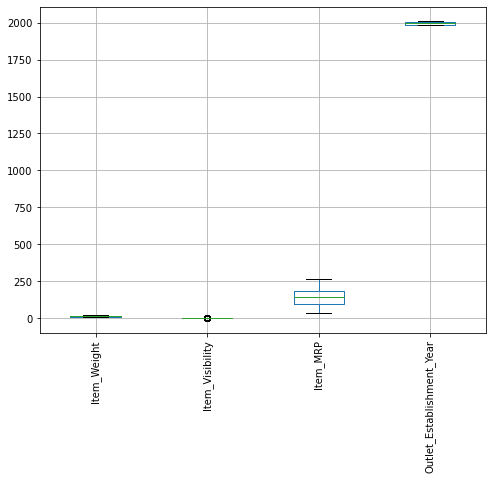

In [1058]:

plt.figure(figsize=[8,6])
test.boxplot()
plt.xticks(rotation=90)

q1=test.quantile(0.25)
q3=test.quantile(0.75)
iqr=q3-q1

ll=q1-1.5*iqr
ul=q3+1.5*iqr

test=test[~((test >ul ) | ( test <ll )).any(axis=1)]

(array([1, 2, 3, 4]),
 [Text(1, 0, 'Item_Weight'),
  Text(2, 0, 'Item_Visibility'),
  Text(3, 0, 'Item_MRP'),
  Text(4, 0, 'Outlet_Establishment_Year')])

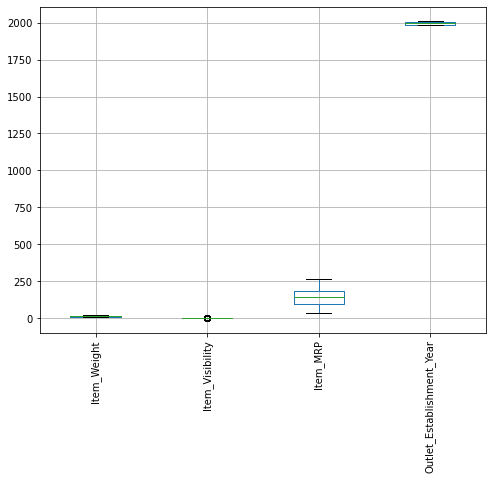

In [1059]:

plt.figure(figsize=[8,6])
test.boxplot()
plt.xticks(rotation=90)

In [1060]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

test.Item_Fat_Content=le.fit_transform(test.Item_Fat_Content)
test.Item_Type=le.fit_transform(test.Item_Type)
#test.Outlet_Identifier=le.fit_transform(test.Outlet_Identifier)
test.Outlet_Size=le.fit_transform(test.Outlet_Size)
test.Outlet_Location_Type=le.fit_transform(test.Outlet_Location_Type)
test.Outlet_Type=le.fit_transform(test.Outlet_Type)

In [1061]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,,
FDW58,20.750,1,0.007565,13,107.8622,OUT049,1999,1,0,1
FDW14,8.300,4,0.038428,4,87.3198,OUT017,2007,3,1,1
NCN55,14.600,1,0.099575,11,241.7538,OUT010,1998,3,2,0
FDQ58,7.315,1,0.015388,13,155.0340,OUT017,2007,3,1,1
FDY38,NaN,2,0.118599,4,234.2300,OUT027,1985,1,2,3


In [1062]:
test.shape

(5681, 10)

In [1063]:
X_test_scaled.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

test=test.dropna(subset=['Item_Weight'])

In [1064]:
from sklearn.model_selection import train_test_split

X_test=test[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type','Item_MRP']]


from sklearn.impute import KNNImputer
knn=KNNImputer()

X_test_impute=pd.DataFrame(knn.fit_transform(X_test),columns=X_test.columns)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_test_data=pd.DataFrame(sc.fit_transform(X_test_impute),columns=X_test_impute.columns)



In [1065]:
X_test_data.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP
0,1.829702,-0.575284,-1.134077,1.366916,-0.536555
1,-0.997814,4.104698,-0.531850,-0.766450,-0.868937
2,0.432977,-0.575284,0.661316,0.892835,1.629848


In [1066]:
X_train_scaled.shape,X_test_scaled.shape

((3720, 9), (930, 9))

In [1067]:
X_test_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP'],
      dtype='object')

In [1068]:
X=df.loc[:,['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP']]


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=10)


X_train_scaled=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

lr_model3=LR.fit(X_train_scaled,y_train)
y_pred3=lr_model3.predict(X_test_scaled)


print('r 2 square-PT ',r2_score(y_test,y_pred3))
print()

print('train score ',lr_model3.score(X_train_scaled,y_train))
print('test score ',lr_model3.score(X_test_scaled,y_test))

y_pred__final=lr_model3.predict(X_test_data)

r 2 square-PT  0.4661098116333767

train score  0.4604893482601635
test score  0.4661098116333767


In [1069]:
test['Item_Outlet_Sales']=y_pred__final

In [1070]:
final_pred= pd.DataFrame({
               'Outlet_Identifier':test['Outlet_Identifier'],'Item_Outlet_Sales':test['Item_Outlet_Sales']})

In [1071]:
final_pred.head()

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,1713.665002
FDW14,OUT017,1443.486476
NCN55,OUT010,3890.001271
FDQ58,OUT017,2512.344101
FDY38,OUT027,3777.437758


In [1072]:
final_pred.to_csv('Bigmart_Sales_Prediction_final__1.csv')